# Regression Practice #

The notebook is for practicing implementing linear and logistic regression models. The emphassis is on best implementation practices, so only uses built-in data sets for ease.

In [25]:
# import necessary packages

import pandas as pd
import numpy as np
from sklearn import datasets, model_selection, feature_selection

import sklearn.linear_model as linmodel
import sklearn.metrics as smets

#import statsmodels.api as stmod

import matplotlib.pyplot as plt
import math

## Linear Regression ##

Import built-in diabetes data set from scikit-learn. Data set has 442 samples with 10 features.

In [16]:
data = datasets.load_diabetes()
X = data['data']
Y = data['target']
feature_names = data['feature_names']

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, train_size=0.7)

Create a linear regression model using all features. 
Print model information including coefficients, intercept, and R^2 value.
Evaluate using mean squared error on the test set.

In [17]:
model = linmodel.LinearRegression().fit(X_train, Y_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
rsq = model.score(X_train, Y_train)
print('R-squared:', rsq)
print()

Y_pred = model.predict(X_test)
mse = smets.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [  -25.01078169  -279.20524608   510.68685703   388.68716374
 -1055.31561314   740.56169511   183.64953058   143.740268
   869.36020183   140.38821777]
Intercept: 151.72158943452115
R-squared: 0.5330263073376078

Mean squared error: 2770.2575755872604


Implement feature selection using SelectKBest() with f_regression() functions to identify the value of each feature. Graph the results to visual which features are useful.

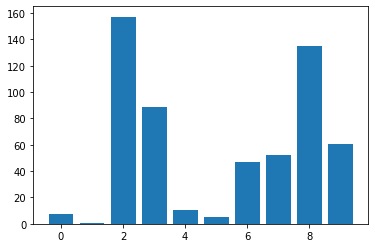

In [18]:
# used to test the output of SelectKBest
#f_st,p_val = feature_selection.f_regression(X_train, Y_train)
#print(f_st)
#print()
#print(p_val)

fit_model = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')
fit_model.fit(X_train, Y_train)
scores = fit_model.scores_

x_ind = np.arange(len(scores))
plt.bar(x_ind, scores)
plt.show()

Based on results, it looks like the best feature is 2, while 8 is also useful. It seems like there are several other useful features, though 1, 5, and 4 are least useful. 

As an arbitrary choice, I will assume adding features 2, 3, 6, 7, 8, 9 as possibly useful for model construction and worthwhile exploring. The number of features that should be used can be viewed as a hyperparameter which can be searched over. 

I will test constructing a model with features, in order of importance by f-statistic and find which offers the best performance on the training data as measured by mean-squared error. When adding a feature to the model, I will continue including the strategies that were deemed more important than it.

In [36]:
# running with subsets of the data will probably be easiest by turning data into dataframe
X_train_df = pd.DataFrame(X_train)

features = [2, 8, 3, 9, 7, 6]
best_sub = [] # best subset of features seen
best_mse = math.inf # best mean_squared error seen

for fi in range(1, len(features)):
    # gather data for features
    curr_feat = features[:fi]
    sub_X = X_train_df[curr_feat]
    if len(curr_feat) == 1:
        sub_X = sub_X.to_numpy().reshape((-1, 1))
        
    # create model and test mse
    sub_model = linmodel.LinearRegression().fit(sub_X, Y_train)
    Y_pred = sub_model.predict(sub_X)
    
    mse = smets.mean_squared_error(Y_train, Y_pred)
    if mse < best_mse:
        best_mse = mse
        best_sub = curr_feat    

print('Best features:', best_sub)

Best features: [2, 8, 3, 9, 7]


Results show that a model with features 2, 3, 7, 8, and 9 demonstrate the best performance on the training data. This also shows my arbitrary choice of cut off point for which features to test was ok, since the wort feature was not deemed useful for the model.

Next, I will construct a model using those features and compare results to the model with all features included when predicting the test set. Note, I could have just used output from the above feature search, but I wanted to separate out the different steps for demonstration purposes.

In [33]:
# make data sets use only necessary features
feats = [2, 3, 8, 7, 9]
new_X_train = X_train_df[feats]
new_X_test = pd.DataFrame(X_test)
new_X_test = new_X_test[feats]

model = linmodel.LinearRegression().fit(new_X_train, Y_train)
rsq = model.score(new_X_train, Y_train)
print('R-squared:', rsq)

Y_pred = model.predict(new_X_test)
mse = smets.mean_squared_error(Y_test, Y_pred)
print('Mean-squared error:', mse)

R-squared: 0.4947715182604221
Mean-squared error: 2904.4045639031838


### Observations ###

Model with all features:
R^2: 0.533
MSE: 2770.258

Model with selective features:
R^2: 0.495
MSE: 2904.405

Data shows that with feature selection, model performance on the test set actually degrades slightly (lower R^2 and a higher MSE). It may be that the feature selected model is overfitting slightly. This data set is rather small (train set has ~309 and testing 
